# Hawks, Rabbits, and Coyotes

In [2]:
#@title
# Import necessary libraries
from os.path import basename, exists
from os import mkdir

def download(url,folder):
    filename = folder + basename(url)
    if not exists(folder):
        mkdir(folder)
    # fetches the file at the given url if it is not already present
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Notebooks/'
        + 'ModSimPy_Functions/modsim.py', 'ModSimPy_Functions/')

from ModSimPy_Functions.modsim import *
import pandas as pd
import numpy as np

Downloaded ModSimPy_Functions/modsim.py


In [3]:
filename = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Data/CT6_Rabbit_data.xlsx'
# If you are using this notebook offline, you will need to upload this data
# from the Images_and_Data folder.  Comment out the line above, and uncomment the
# line below this one, and run this cell
# filename = '../Images_and_Data/Data/World_population_estimates.html'

data = pd.read_excel(filename, header=0, index_col=0)


In [4]:
def make_system(params):
    r1, r2, r3, r4, h1, h2, c1, c2, dt, t_0, t_end, iR, iH, iC = params.values()
    N = iR + iH + iC
    init = pd.Series(dict(R=(iR/N)*100, H=(iH/N)*100, C=(iC/N)*100),dtype=np.float64)
    system = dict(init=init,
                  r1=r1,r2=r2,
                  r3=r3, r4=r4, h1=h1, h2=h2,
                  c1=c1, c2=c2,dt=dt, t_0=t_0,
                  t_end=t_end)
    
    return system


In [59]:
def slope_func(t, state, system):
    R, H, C = state
    r1, r2, r3, r4, dt = system['r1'],system['r2'], system['r3'], system['r4'], system['dt']
    h1, h2, c1, c2 = system['h1'], system['h2'], system['c1'], system['c2']

    if t < 750:
        c1 = 0.0
        c2 = 0.0
        r4 = 0.0


    if R > 0.5:
        R_min = R
    else:
        R_min = 0.5   
    dRdt = (r1 * R) - (r2*R*H) - (r3*R) - (r4*R*C)
    dHdt = (h1 * H * R) - (h2 * (H/R_min))
    dCdt = (c1 * C * R) - (c2 * (C/R_min))
    
    return dRdt, dHdt, dCdt

def run_simulation(params):
    system = make_system(params)
    results, details = run_solve_ivp(system, slope_func)

    #results.plot(xlabel='Time (min)', subplots=True, title='Rabbits, Hawks, and Coyotes', legend=True);
    return results

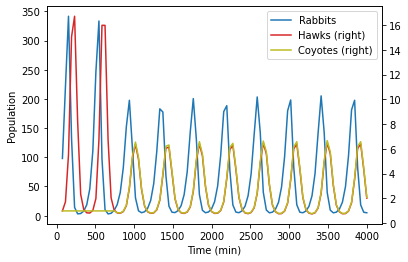

In [60]:
r1 = 0.03; r3 = 0.003       # Rabbit births and natural deaths
r2 = 0.005; r4 = 0.005     # Hawk- and coyote -caused rabbit deaths

h1 = 0.0001; h2 = 0.1       # Hawk births and deaths

c1 = 0.0001; c2 = 0.1    # Coyote births and deaths
iR = 500.0; iH = 5; iC = 5 # Initial populations
dt = 1.0; t_0 = 75; t_end = 4000.0; 

params = dict(r1=r1, r2=r2, r3=r3, r4=r4, h1=h1, h2=h2, c1=c1, c2=c2, dt=dt, t_0=t_0, t_end=t_end, iR=iR, iH=iH, iC=iC)
results = run_simulation(params)

#results.plot(ylabel='Rabbit Popultion (per 100 animals)', legend=True, xlabel='Time');

# Creates an 'axis' object that gets carried into the next plot() function
ax_second = results.plot(y='R', color='C0',  
             label='Rabbits',legend=True)

# Plots both the primary data 'X' and the secondary axis 'ax_second'
results.plot(y='H', color='C3',secondary_y=True, ax=ax_second, 
             label='Hawks', xlabel='Time (min)',ylabel='Population', 
               legend=True);
results.plot(y='C', color='C8',secondary_y=True, ax=ax_second, 
             label='Coyotes', legend=True);

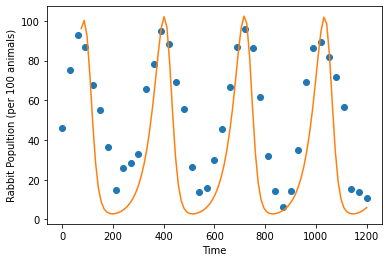

In [7]:
data.plot(style='o',ylabel='Rabbit Popultion (per 100 animals)', legend=False);
results.R.plot();